# Intelligent Agents: Vacuum-cleaner World

Implement a simulator environment for a vacuum-cleaner world and a set of intelligent agents.

## PEAS description

__Performance Measure:__ Each action costs 1. The performance is measured as the sum of the cost to clean the whole environment.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size of the layout of the room (i.e., it knows n and where it starts).

__Actuators:__ The agent can `clean` the current square or move to an adjacent square by going `north`, `east`, `west`, or `south`.

__Sensors:__ Four bumper sensors, one for north`, `east`, `west`, and `south`; a dirt sensor reporting dirt in the current square.  

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop untill all squares are clean or a predefined number of steps have been reached.

## Define the agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictonary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`; not specified bumpers are assumed to be `False`. E.g., if the agent is on the north-west corner, `bumpers` gets `{"north" : True, "west" : True}` or if the agent is not close to a border then it gets `{}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [9]:
from numpy import random

actions = ["north", "east", "west", "south", "suck"]


def simple_randomized_agent(bumpers, dirty):
    return random.choice(actions)

In [10]:
simple_randomized_agent({"north" : True}, True)

'south'

## Simple environment example

The environment is infinite in size (bumpers are always `False`) and every square is dirty. We run the agent for 10 times steps.

In [11]:
for i in range(10):
    print(simple_randomized_agent({"north" : False, "south" : False, "west" : False, "east" : False}, True))

east
south
north
east
east
east
east
south
suck
west


# Tasks

_Submission Instructions:_ Use this notebook to prepare your submission. Complete this section with your code and results. You can use Markdown blocks for your description, comments in the code and use mathplotlib to produce charts. If you use external code files then you can include them with 

```
from notebook import psource
psource("your_file.py")
```

_Note:_ Try to keep the code simple! In this couse, we want to learn about the algorithms and we often do not need to use object-oriented design. 


## Task 1: Implement a simulation environment

Your environment simulator needs to create squares, make some dirty, and proivde the agent function with the sensor inputs. The environment needs to evaluate the performance measure. It needs to track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The simulation environment needs to work with the simple randomized agent program from above.

In [28]:
# Your code goes here
import numpy as np

def simulation_environment(agent, n = 5, p = .2, max_steps = 20000, verb = True):
    
    room = np.random.choice(a=[True, False], size=(n,n), p =[p, 1-p])
    if(verb): print(room)
    to_clean = np.sum(room)
    if(verb): print("Dirty squares: ", to_clean)
    
    pos = [0,0]
    
    for i in range(max_steps):
        bumpers = {
            "north": pos[0] == 0,
            "south": pos[0] == n-1,
            "west": pos[1] == 0,
            "east": pos[1] == n-1
        }
        dirty = room[pos[0], pos[1]]
        action = agent(bumpers, dirty)
        
        if(action == "north" and pos[0]>0): pos[0] = pos[0]-1
        if(action == "south" and pos[0]<(n-1)): pos[0] = pos[0]+1
        if(action == "west" and pos[1]>0): pos[1] = pos[1]-1
        if(action == "east" and pos[1]<(n-1)): pos[1] = pos[1]+1
        if(action == "suck"): room[pos[0], pos[1]] = False
            
        to_clean = np.sum(room)
        
        if(to_clean < 1): break
        
    return(i)


simulation_environment(simple_randomized_agent, max_steps = 10)


[[False False False False False]
 [False False False False False]
 [False False False False  True]
 [False False False False False]
 [False False False False False]]
Dirty squares:  1


9

422.877


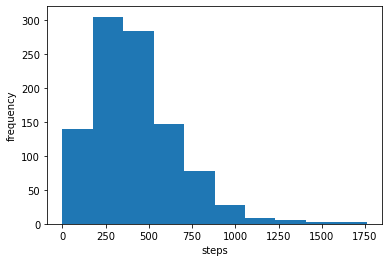

In [13]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    steps[i] = simulation_environment(simple_randomized_agent, verb = False)
    
    
print(np.mean(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

## Task 2:  Implement a simple reflex agent

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking.

In [14]:
# Your code goes here

def simple_reflex_agent(bumpers, dirty):
    if(dirty): return "suck"
    
    open_directions=[]
    x = bumpers.items()
    for i in x:
        if(not i[1]): open_directions.append(i[0])
            
    
    return random.choice(open_directions)

                         
simulation_environment(simple_reflex_agent, verb = False)

198

104.799


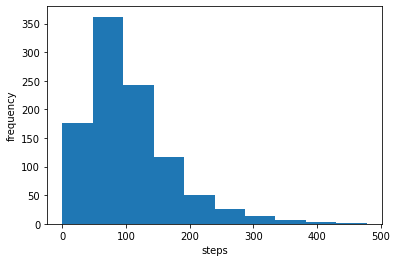

In [15]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    steps[i] = simulation_environment(simple_reflex_agent, verb = False)
    
    
print(np.mean(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

## Task 3: Implement a model-based reflex agent 

This agent keeps track of the location and remembers where it has cleaned. Assume the agent knows how many squares the room has and where it starts. It can now use more advanced navigation.

_Note on implementing the state:_ You can use a global variable. In Python, you have to use the keyword `global` in your function for this to work (see: https://www.programiz.com/python-programming/global-keyword). Alternatively, you can define a class for your agent with a member variable for the state and a function for the agent program (see: https://www.w3schools.com/python/python_classes.asp). 

Describe how your agent will perform 
* if it is put into a larger room, 
* if the room contains obstacles, or 
* if it starts in a random square.

In [16]:
# Your code goes here
right = True
def simple_model_agent(bumpers, dirty):
    if(dirty):
        #print('suck') 
        return "suck"
    global right
    if(right):
        if(not bumpers.get("east")): 
            #print('east')
            return "east"
        else:
            right = False
            #print('south')
            return "south"
        
    if(not bumpers.get("west")):  
        #print('west') 
        return "west"
    else:
        right = True
        #print('south')
        return "south"

                         
simulation_environment(simple_model_agent, verb = False)

21

24.122


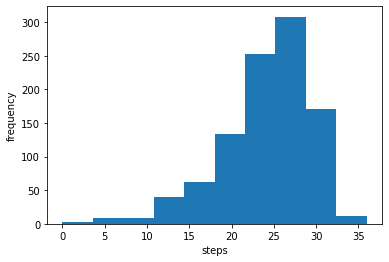

In [17]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    right = True
    steps[i] = simulation_environment(simple_model_agent, verb = False)
    
    
print(np.mean(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

* If it is put into a larger roo: My agent will still be able to clean the room, but it should take a proportional amount of time longer to clean the room due to the added squares it will need to go through. 
* If the room contains obstacles: My agent would not work or it would be unlikely for it to work in the case of an obstacle being in the room. It could still clean the room fully if the squares below the obstacle are all clean. In this scenario, my agent would still be able to follow its path of going back forth of all the way east and all the west with a step down once it hits the wall all the way until the obstacle in which the room would be clean. If this is not the case and let's say the obstacle exists on the first row, my agent would not clean the full room. It would take a step down thinking this is the end of the wall and miss that portion of the room that the obstacle is blocking off.
* If it starts in a random square: My agent would not work as it is built with the notion that it is starting in the (0,0) square each time. My agent works with this assumption in mind by traveling all the way east until it hits the wall. Then, it takes a step down and travels all the way west until it hits the wall. It would take a step down to travel east and repeat this process until the room is fully cleaned. Thus, if it was placed in a random spot, it would miss the squares that are north and west of its starting spot.

## Task 4: Simulation study

Compare the performance of the agents using different size environments. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use at least 100 random runs for each.

Average number of steps:  426.93
Median:  383.0
Standard deviation:  255.36297519413418
Range:  0  -  2243


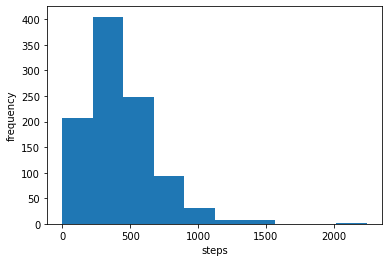

In [18]:
# Your code goes here


N = 1000
steps = np.repeat(0, N)
for i in range(N):
    steps[i] = simulation_environment(simple_randomized_agent, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()


Average number of steps:  103.287
Median:  86.5
Standard deviation:  71.74998697560858
Range:  0  -  619


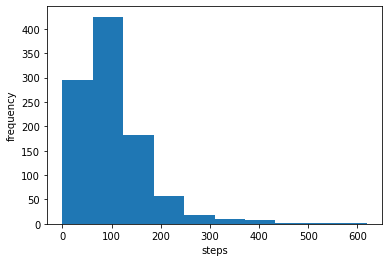

In [19]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    steps[i] = simulation_environment(simple_reflex_agent, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

Average number of steps:  24.357
Median:  25.0
Standard deviation:  5.257713476407782
Range:  0  -  35


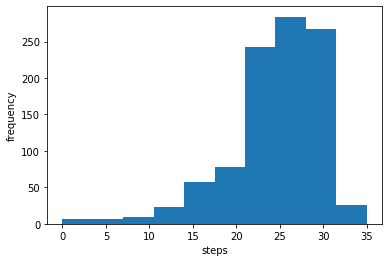

In [20]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    right = True
    steps[i] = simulation_environment(simple_model_agent, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

Average number of steps:  2943.866
Median:  2775.5
Standard deviation:  1090.1709645940862
Range:  647  -  8822


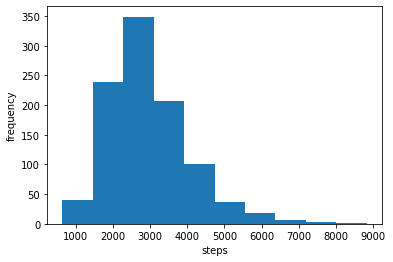

In [22]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    steps[i] = simulation_environment(simple_randomized_agent, n = 10, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

Average number of steps:  911.124
Median:  816.0
Standard deviation:  419.9510359839585
Range:  222  -  3097


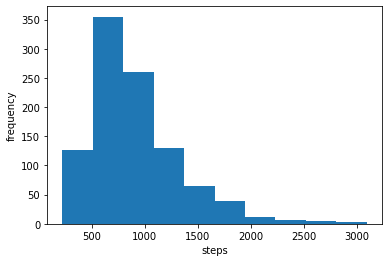

In [23]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    steps[i] = simulation_environment(simple_reflex_agent, n = 10, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

Average number of steps:  114.169
Median:  115.0
Standard deviation:  6.659312201721736
Range:  83  -  130


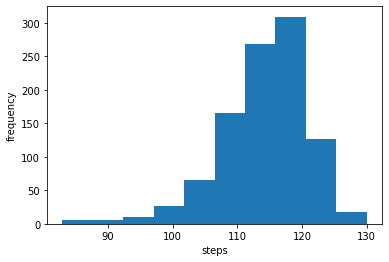

In [24]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    right = True
    steps[i] = simulation_environment(simple_model_agent, n = 10, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

Average number of steps:  19999.0
Median:  19999.0
Standard deviation:  0.0
Range:  19999  -  19999


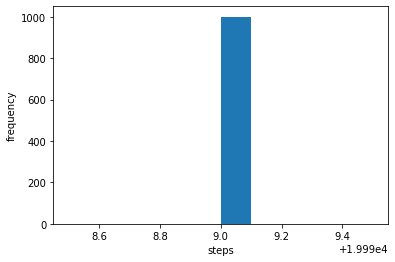

In [29]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    steps[i] = simulation_environment(simple_randomized_agent, n = 100, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

Average number of steps:  19999.0
Median:  19999.0
Standard deviation:  0.0
Range:  19999  -  19999


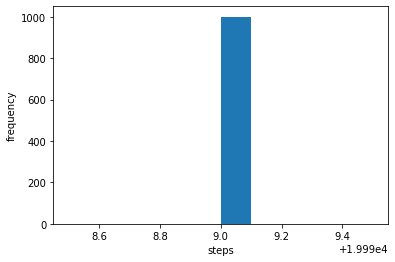

In [30]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    steps[i] = simulation_environment(simple_reflex_agent, n = 100, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

Average number of steps:  11995.358
Median:  11994.0
Standard deviation:  40.738063724237065
Range:  11865  -  12118


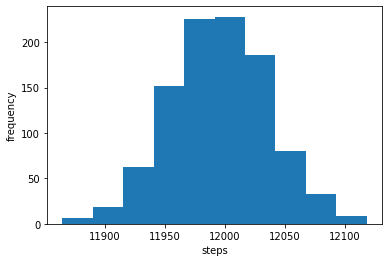

In [31]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    right = True
    steps[i] = simulation_environment(simple_model_agent, n = 100, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

I am going to run the trials below with a 50 x 50 square since the reflex and randomized agent could not complete the 100 x 100, even with the max steps extended out to 20,000

Average number of steps:  19999.0
Median:  19999.0
Standard deviation:  0.0
Range:  19999  -  19999


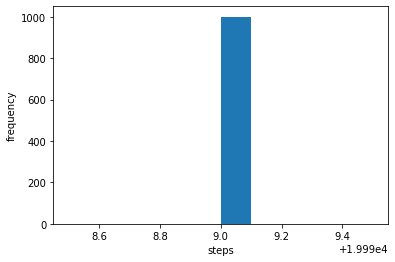

In [32]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    steps[i] = simulation_environment(simple_randomized_agent, n = 50, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

50 x 50 is too big for the randomized agent so going to scale it down to 25 x 25

Average number of steps:  19927.83
Median:  19999.0
Standard deviation:  406.8494624550953
Range:  15610  -  19999


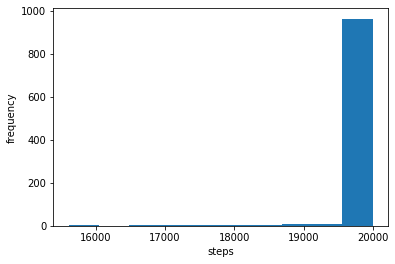

In [34]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    steps[i] = simulation_environment(simple_randomized_agent, n = 25, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

Average number of steps:  10727.625
Median:  9995.5
Standard deviation:  3475.642921874311
Range:  4641  -  19999


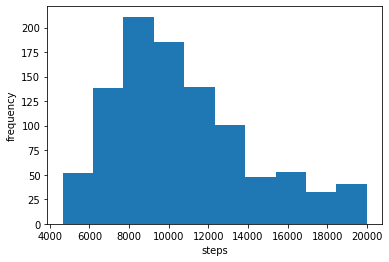

In [37]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    steps[i] = simulation_environment(simple_reflex_agent, n = 25, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

Average number of steps:  744.132
Median:  744.0
Standard deviation:  11.588208489667418
Range:  702  -  791


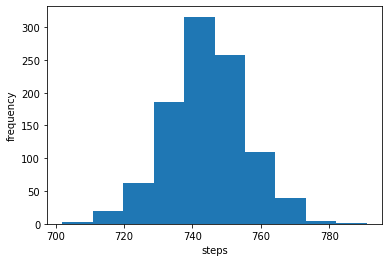

In [39]:
N = 1000
steps = np.repeat(0, N)
for i in range(N):
    right = True
    steps[i] = simulation_environment(simple_model_agent, n = 25, verb = False)
    
    
print("Average number of steps: ", np.mean(steps))
print("Median: ", np.median(steps))
print("Standard deviation: ", np.std(steps))
print("Range: ", np.min(steps), " - ", np.max(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

Overall, the agents ranked in best to worst in terms of performance ranked the Model Agent, the Reflex Agent, and then the Randomized Agent. This order of performance was consistent regardless of the environment size. One thing that is interesting to note is that both the Randomized and Reflex Agents produced a right skewed graph while the Model Agent produced a more left skewed graph (this trend is more evident in the smaller environments). When attempting to run at an environment that is 100 x 100, only the Model Agent was able to clean the environment. Additionally, the randomized agent typically failed when trying to clean an environment that was 25 x 25 while both the Reflex Agent and the Model Agent were able to complete it. I am listing the average number of steps for the various agents at the different environment sizes below.

<strong>Randomized Agent </strong>
* 5 x 5: 426.93 (average steps)
* 10 x 10: 2943.866 (average steps)
* 25 x 25: 19927.83 (average steps)
* 100 x 100: Could not finish

<strong>Reflex Agent </strong>
* 5 x 5: 103.287 (average steps)
* 10 x 10: 911.124 (average steps)
* 25 x 25: 10727.625 (average steps)
* 100 x 100: Could not finish

<strong>Model Agent </strong>
* 5 x 5: 24.357 (average steps)
* 10 x 10: 114.169 (average steps)
* 25 x 25: 744.132 (average steps)
* 100 x 100: 11995.358 (average steps)


## Bonus tasks

* __Obstacles:__ Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.
* __Unknown environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square.
* __Utility-based agent:__ Change the environment, so each square has a fixed probability of getting dirty again. We assume the agent has learned this information over time. For the implementation, we give this information to the agent as a 2-dimensional array of probabilities  Cleaning one dirty square produces a utility of 1. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 10000 time steps. This is very tricky!

In [ ]:
# Your code goes here